# Detect Cars Tutorial
This notebook shows how to use every vision capability in Moondream.
You'll caption an image, ask a question about it, detect cars with boxes,
point to each car's center, and then process an entire folder, saving the
overlayed images and a JSON summary.

In [34]:
import os
import json
from PIL import Image, ImageDraw
from IPython.display import display
import moondream as md

# Initialize the model to run locally
model = md.vl(endpoint="http://localhost:2020/v1")
# For Moondream Cloud use:
# model = md.vl(api_key="<your-api-key>")

INPUT_FOLDER = os.path.join("../../images/cars")
OUTPUT_FOLDER = os.path.join(INPUT_FOLDER, 'detected')
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

image_files = [f for f in os.listdir(INPUT_FOLDER) if f.lower().endswith(('png','jpg','jpeg'))]

## Run all capabilities on one image
We'll caption the first image, ask a question, detect cars with boxes, and point to them.

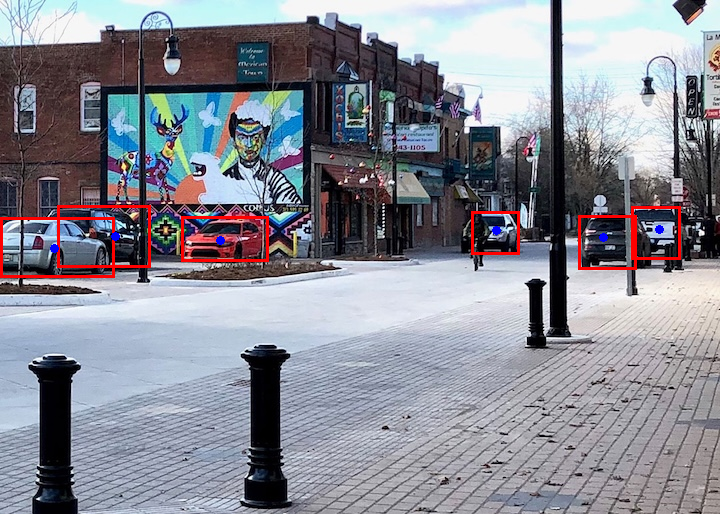

(' The image captures a vibrant street scene, likely in a downtown area. The street is lined with brick buildings, some of which feature colorful murals, including a mural depicting a woman with a dragon-like creature. The buildings are adorned with various signs and advertisements, including a "Welcome to Mexico" sign. The street is paved with brick or stone and has a sidewalk on the right side. Several cars are parked along the street, and a few people are walking on the sidewalk. A person is also riding a bicycle on the street. The sky is a clear blue, and the overall impression is of a lively and bustling downtown area.',
 ' Yes, there are cars in the image, parked along the street and driving down the road.',
 [{'x_min': 0.000905059278011322,
   'y_min': 0.422283049672842,
   'x_max': 0.15925119072198868,
   'y_max': 0.540607575327158},
  {'x_min': 0.08035768568515778,
   'y_min': 0.4003964513540268,
   'x_max': 0.20870481431484222,
   'y_max': 0.5195254236459732},
  {'x_min': 0.2

In [35]:
first_path = os.path.join(INPUT_FOLDER, image_files[0])
first_image = Image.open(first_path)
caption = model.caption(first_image)['caption']
answer = model.query(first_image, "Are there cars in the image?")['answer']
detection = model.detect(first_image, 'car')['objects']
points = model.point(first_image, 'car')['points']
overlay = first_image.copy()
draw = ImageDraw.Draw(overlay)
w, h = overlay.size
for box in detection:
    draw.rectangle([
        int(box['x_min'] * w),
        int(box['y_min'] * h),
        int(box['x_max'] * w),
        int(box['y_max'] * h)
    ], outline='red', width=3)
for pt in points:
    r = 4
    draw.ellipse([
        int(pt['x'] * w) - r, int(pt['y'] * h) - r,
        int(pt['x'] * w) + r, int(pt['y'] * h) + r
    ], fill='blue')
display(overlay)
caption, answer, detection, points

## Process the entire folder
Now let's run caption, query, detect, and point on every image, saving overlayed versions and recording the results in a JSON file.

In [36]:
results = []
for fname in image_files:
    img_path = os.path.join(INPUT_FOLDER, fname)
    img = Image.open(img_path)
    caption = model.caption(img)['caption']
    answer = model.query(img, "Are there cars in the image?")['answer']
    boxes = model.detect(img, 'car')['objects']
    points = model.point(img, 'car')['points']
    ov = img.copy()
    d = ImageDraw.Draw(ov)
    w, h = ov.size
    for b in boxes:
        d.rectangle([
            int(b['x_min'] * w),
            int(b['y_min'] * h),
            int(b['x_max'] * w),
            int(b['y_max'] * h)
        ], outline='red', width=3)
    for p in points:
        r = 4
        d.ellipse([
            int(p['x'] * w) - r, int(p['y'] * h) - r,
            int(p['x'] * w) + r, int(p['y'] * h) + r
        ], fill='blue')
    out_path = os.path.join(OUTPUT_FOLDER, fname)
    ov.save(out_path)
    results.append({'original': img_path, 'overlay': out_path, 'caption': caption, 'answer': answer, 'boxes': boxes, 'points': points})

json_path = os.path.join(OUTPUT_FOLDER, 'results.json')
with open(json_path, 'w') as f:
    json.dump(results, f, indent=2)

f'Saved {len(results)} results to {json_path}'

'Saved 3 results to ../../images/cars/detected/results.json'